#  Iris flower classfication

# Importing Libraries

In [ ]:
import pandas as pd

# Reading Dataset

In [ ]:
data = pd.read_csv('/content/Iris (1).csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data preprocessing

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [ ]:
df = data.groupby(['Species'])
df.first()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,5.1,3.5,1.4,0.2
Iris-versicolor,51,7.0,3.2,4.7,1.4
Iris-virginica,101,6.3,3.3,6.0,2.5


# Data Visualization

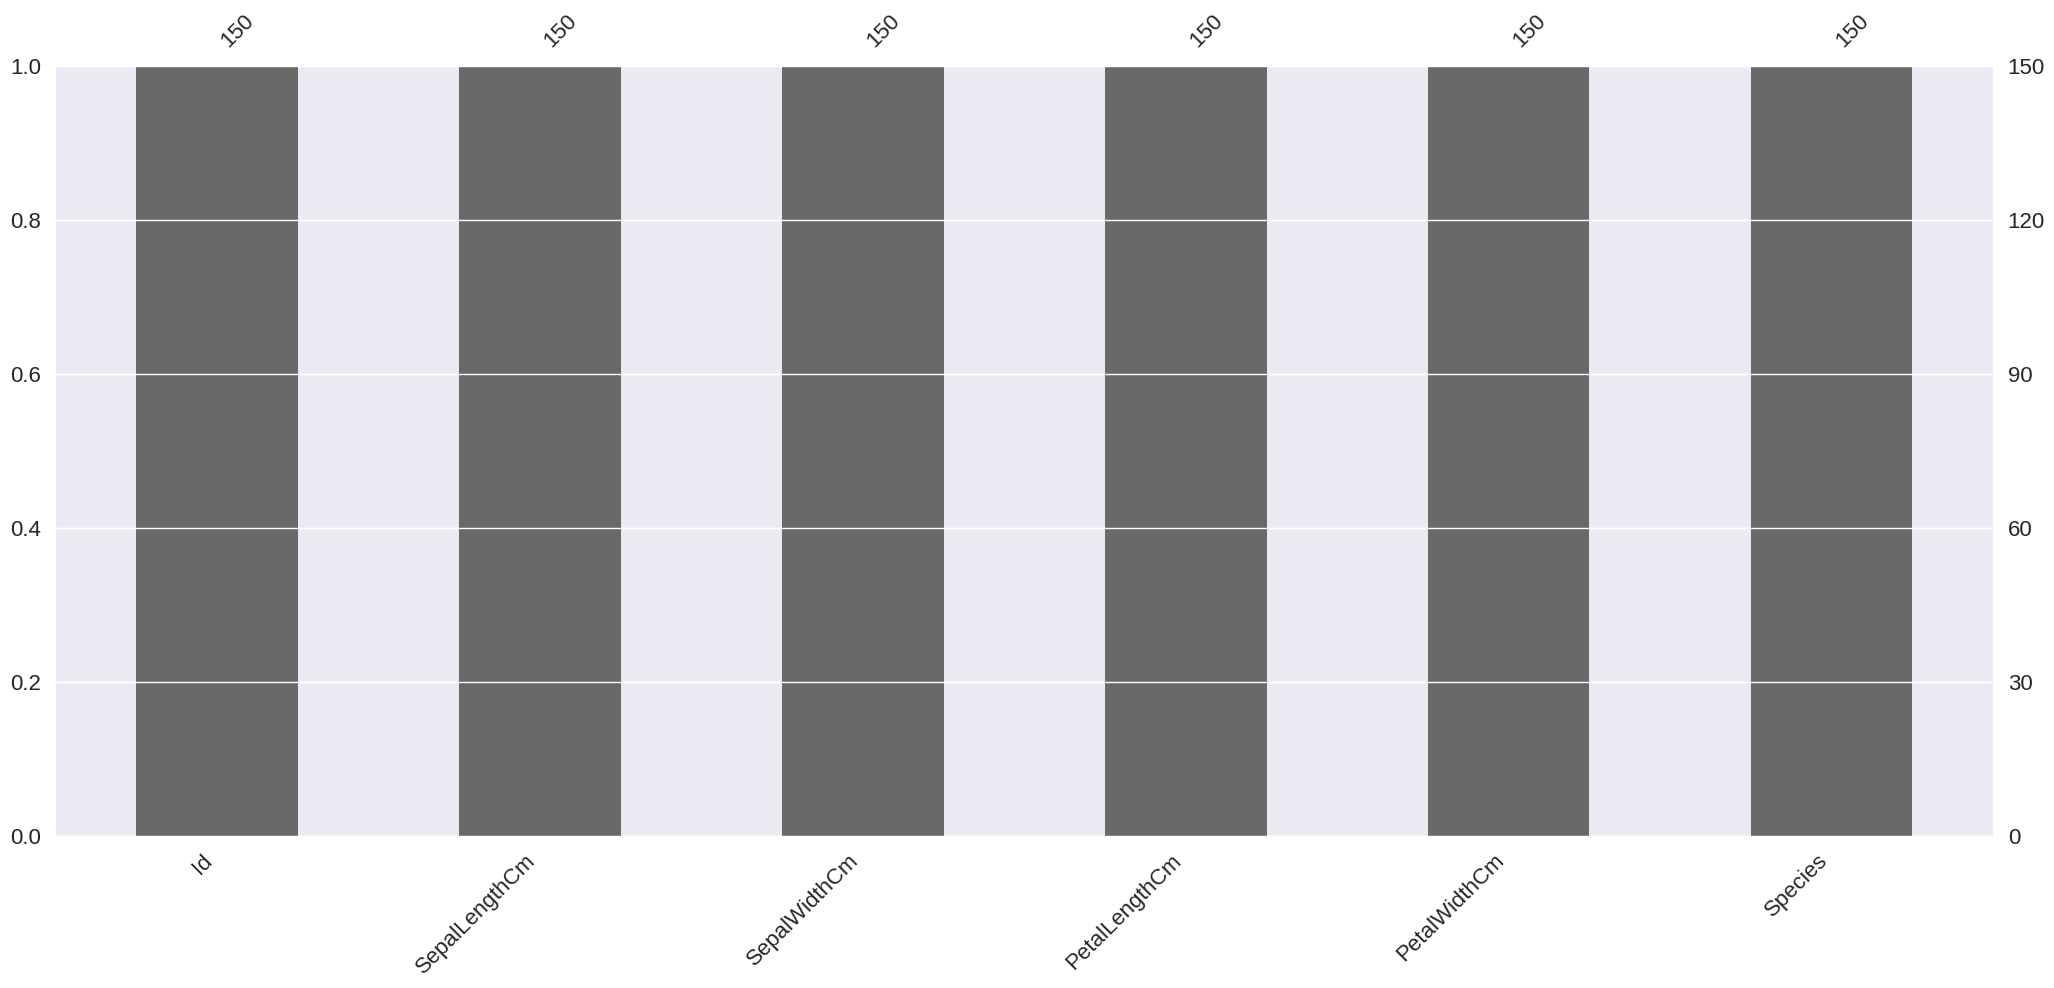

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno 
msno.bar(data)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



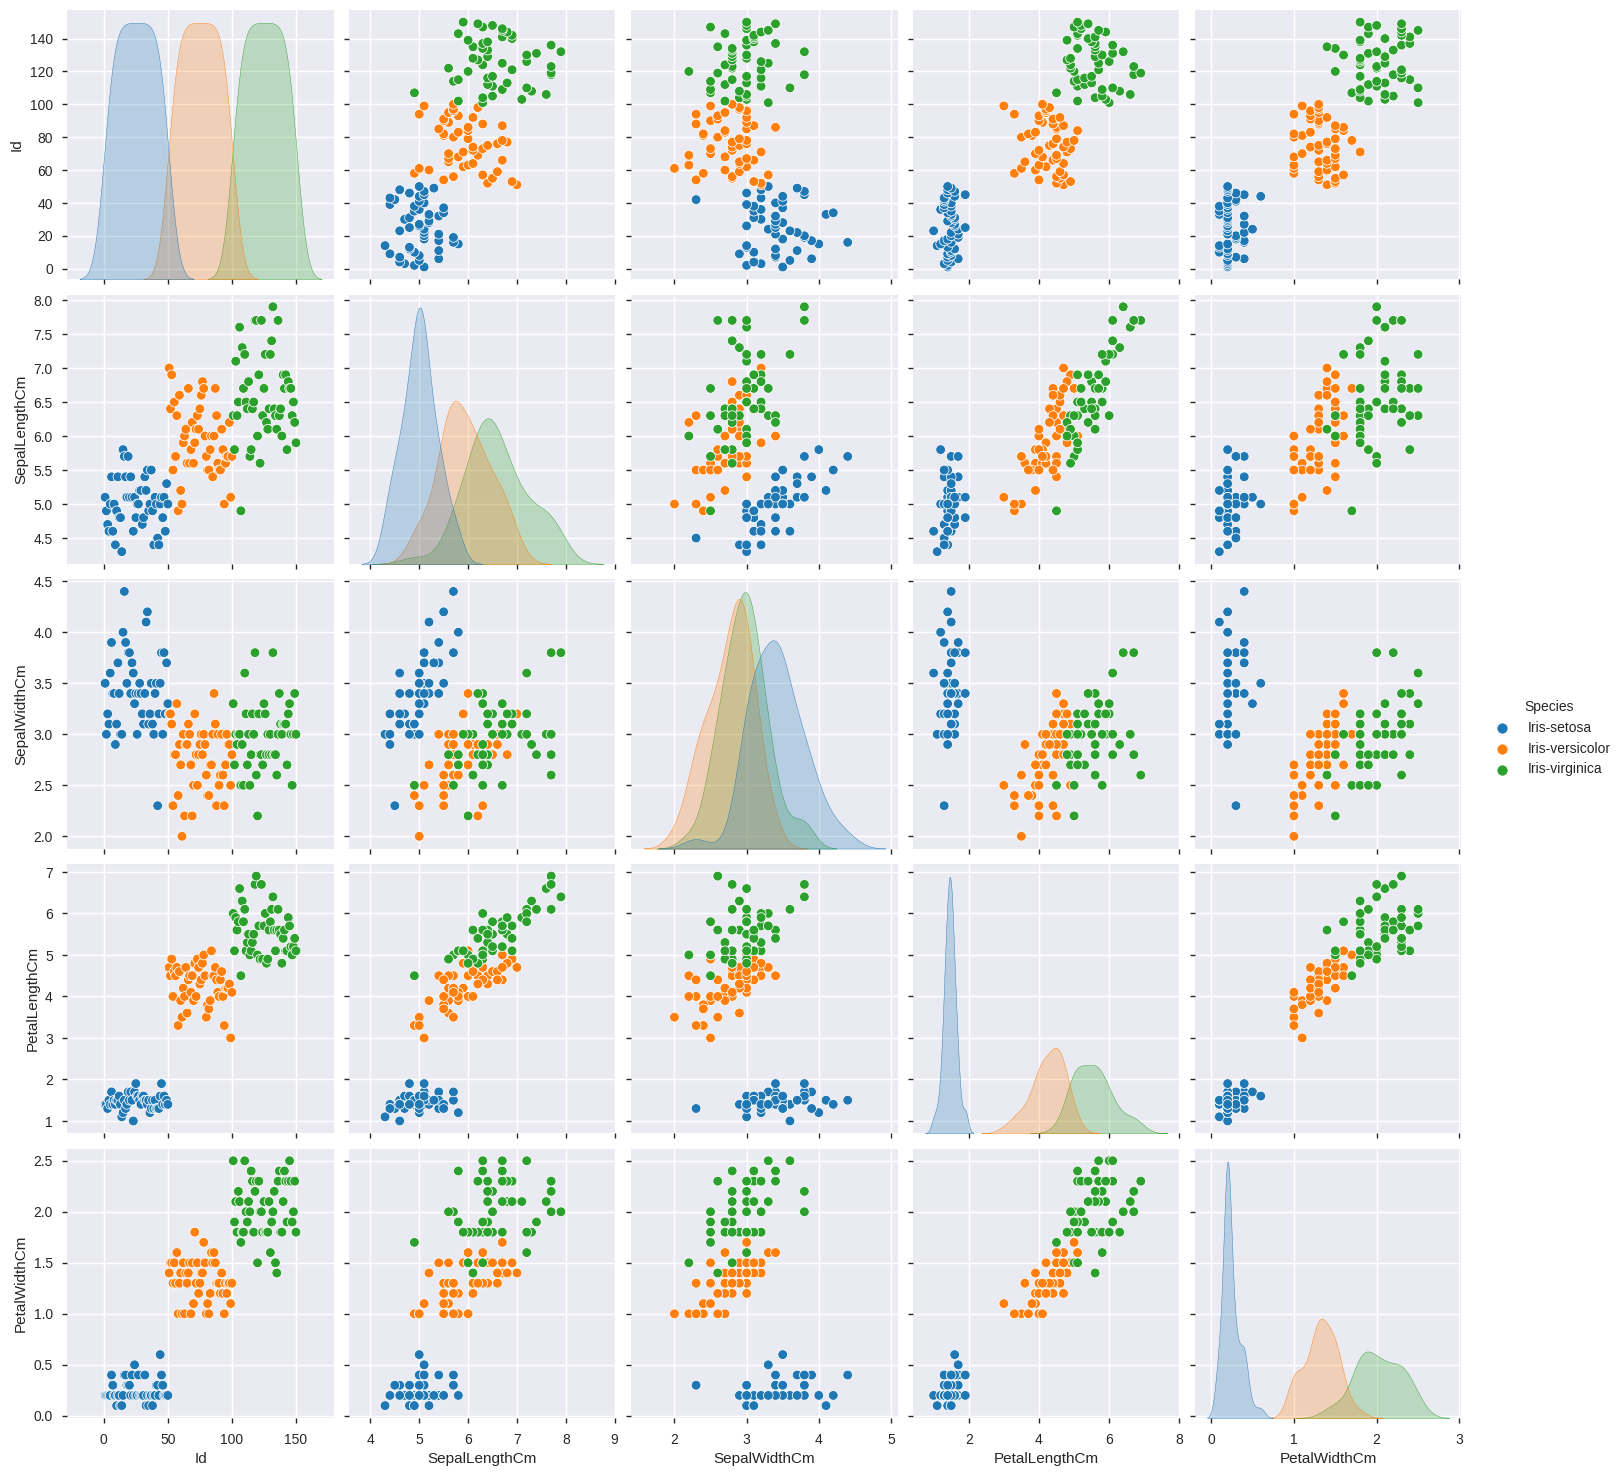

In [ ]:
import seaborn as sns
sns.pairplot(data, hue = 'Species', size = 3)

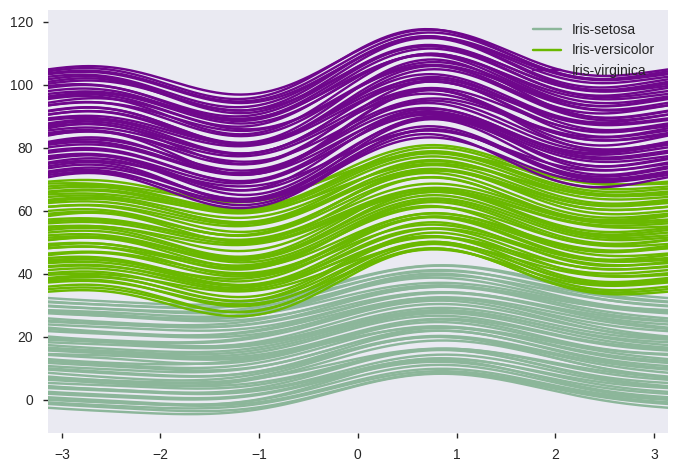

In [ ]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(data, "Species")

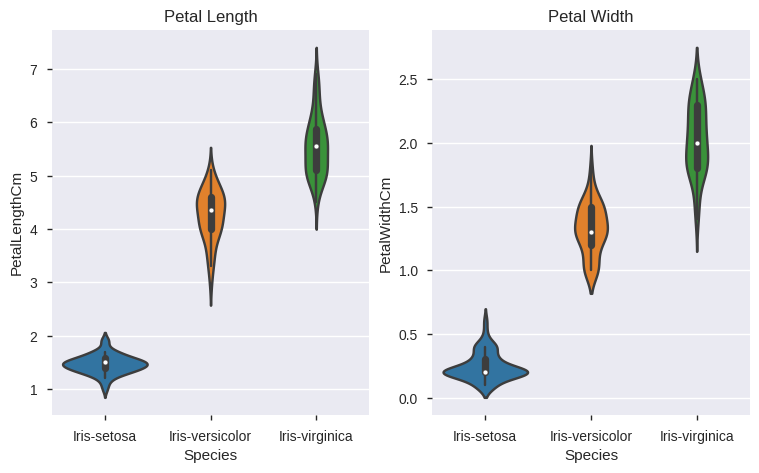

In [ ]:
plt.figure(figsize = (9,5))

plt.subplot(1,2,1)
sns.violinplot(y = data['PetalLengthCm'], x = data['Species'])
plt.title('Petal Length')

plt.subplot(1,2,2)
sns.violinplot(y = data['PetalWidthCm'], x = data['Species'])
plt.title('Petal Width')


plt.show()

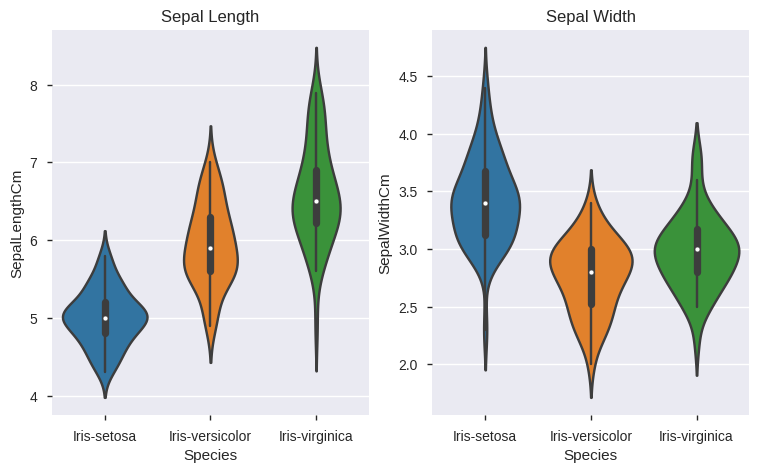

In [ ]:
plt.figure(figsize = (9,5))

plt.subplot(1,2,1)
sns.violinplot(y = data['SepalLengthCm'], x = data['Species'])
plt.title('Sepal Length')

plt.subplot(1,2,2)
sns.violinplot(y = data['SepalWidthCm'], x = data['Species'])
plt.title('Sepal Width')


plt.show()

In [ ]:
x = data.drop(['Id', 'Species'], axis = 1)
y = data['Species']

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
data['Species'].dtype

dtype('O')

In [ ]:
data['Species'] = pd.Categorical(data.Species)
data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: category
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [ ]:
data['Species'].dtype

CategoricalDtype(categories=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ordered=False)

In [ ]:
data['Species'] = data.Species.cat.codes
data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int8

In [ ]:
y = to_categorical(data.Species)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 123)

In [ ]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (4,)))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test))


Epoch 1/30
4/4 [==============================] - 1s 81ms/step - loss: 1.2877 - accuracy: 0.3667 - val_loss: 1.2500 - val_accuracy: 0.2000
Epoch 2/30
4/4 [==============================] - 0s 13ms/step - loss: 1.1005 - accuracy: 0.3667 - val_loss: 1.0937 - val_accuracy: 0.2667
Epoch 3/30
4/4 [==============================] - 0s 16ms/step - loss: 1.0225 - accuracy: 0.3833 - val_loss: 1.0026 - val_accuracy: 0.3667
Epoch 4/30
4/4 [==============================] - 0s 13ms/step - loss: 0.9770 - accuracy: 0.3250 - val_loss: 0.9388 - val_accuracy: 0.4333
Epoch 5/30
4/4 [==============================] - 0s 20ms/step - loss: 0.9291 - accuracy: 0.4500 - val_loss: 0.8756 - val_accuracy: 0.7333
Epoch 6/30
4/4 [==============================] - 0s 15ms/step - loss: 0.8719 - accuracy: 0.6333 - val_loss: 0.8275 - val_accuracy: 0.8000
Epoch 7/30
4/4 [==============================] - 0s 14ms/step - loss: 0.8277 - accuracy: 0.7750 - val_loss: 0.7927 - val_accuracy: 0.8000
Epoch 8/30
4/4 [===========

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.3991 - accuracy: 0.9333


[0.39913469552993774, 0.9333333373069763]

In [ ]:
pred = model.predict(x_test[:10])
print(pred)

1/1 [==============================] - 0s 57ms/step
[[0.02191645 0.4238895  0.55419415]
 [0.01424069 0.3758155  0.60994375]
 [0.00919331 0.31785926 0.6729474 ]
 [0.09527164 0.557934   0.34679437]
 [0.8403925  0.13102947 0.02857793]
 [0.03640496 0.4619709  0.50162405]
 [0.03694084 0.4499364  0.5131228 ]
 [0.87063795 0.10694236 0.02241972]
 [0.81724465 0.14633802 0.03641723]
 [0.04617833 0.5134268  0.44039488]]


In [ ]:
import numpy as np
p = np.argmax(pred, axis = 1)
print(p)
print(y_test[:10])

[2 2 2 1 0 2 2 0 0 1]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
history.history['accuracy']

[0.36666667461395264,
 0.36666667461395264,
 0.38333332538604736,
 0.32499998807907104,
 0.44999998807907104,
 0.6333333253860474,
 0.7749999761581421,
 0.8583333492279053,
 0.8500000238418579,
 0.875,
 0.800000011920929,
 0.7250000238418579,
 0.7749999761581421,
 0.8999999761581421,
 0.9333333373069763,
 0.925000011920929,
 0.9166666865348816,
 0.949999988079071,
 0.925000011920929,
 0.925000011920929,
 0.9416666626930237,
 0.9333333373069763,
 0.9333333373069763,
 0.949999988079071,
 0.949999988079071,
 0.9666666388511658,
 0.9750000238418579,
 0.9666666388511658,
 0.9666666388511658,
 0.9666666388511658]

In [ ]:
history.history['val_accuracy']

[0.20000000298023224,
 0.2666666805744171,
 0.36666667461395264,
 0.4333333373069763,
 0.7333333492279053,
 0.800000011920929,
 0.800000011920929,
 0.7333333492279053,
 0.800000011920929,
 0.8666666746139526,
 0.8666666746139526,
 0.8333333134651184,
 0.8999999761581421,
 0.9333333373069763,
 0.9333333373069763,
 0.8999999761581421,
 0.8666666746139526,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763,
 0.8999999761581421,
 0.9333333373069763,
 0.9333333373069763,
 0.9333333373069763]

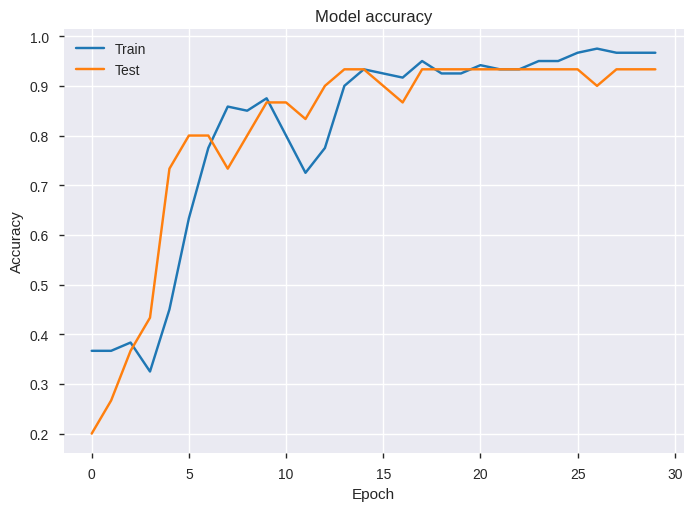

In [ ]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()